In [1]:
import matplotlib.pyplot as plt

In [5]:
FLOW_TYPE = "CNF"
HIDDEN_LAYERS = [512, 512, 512]
INIT_METHOD = "Leiden"

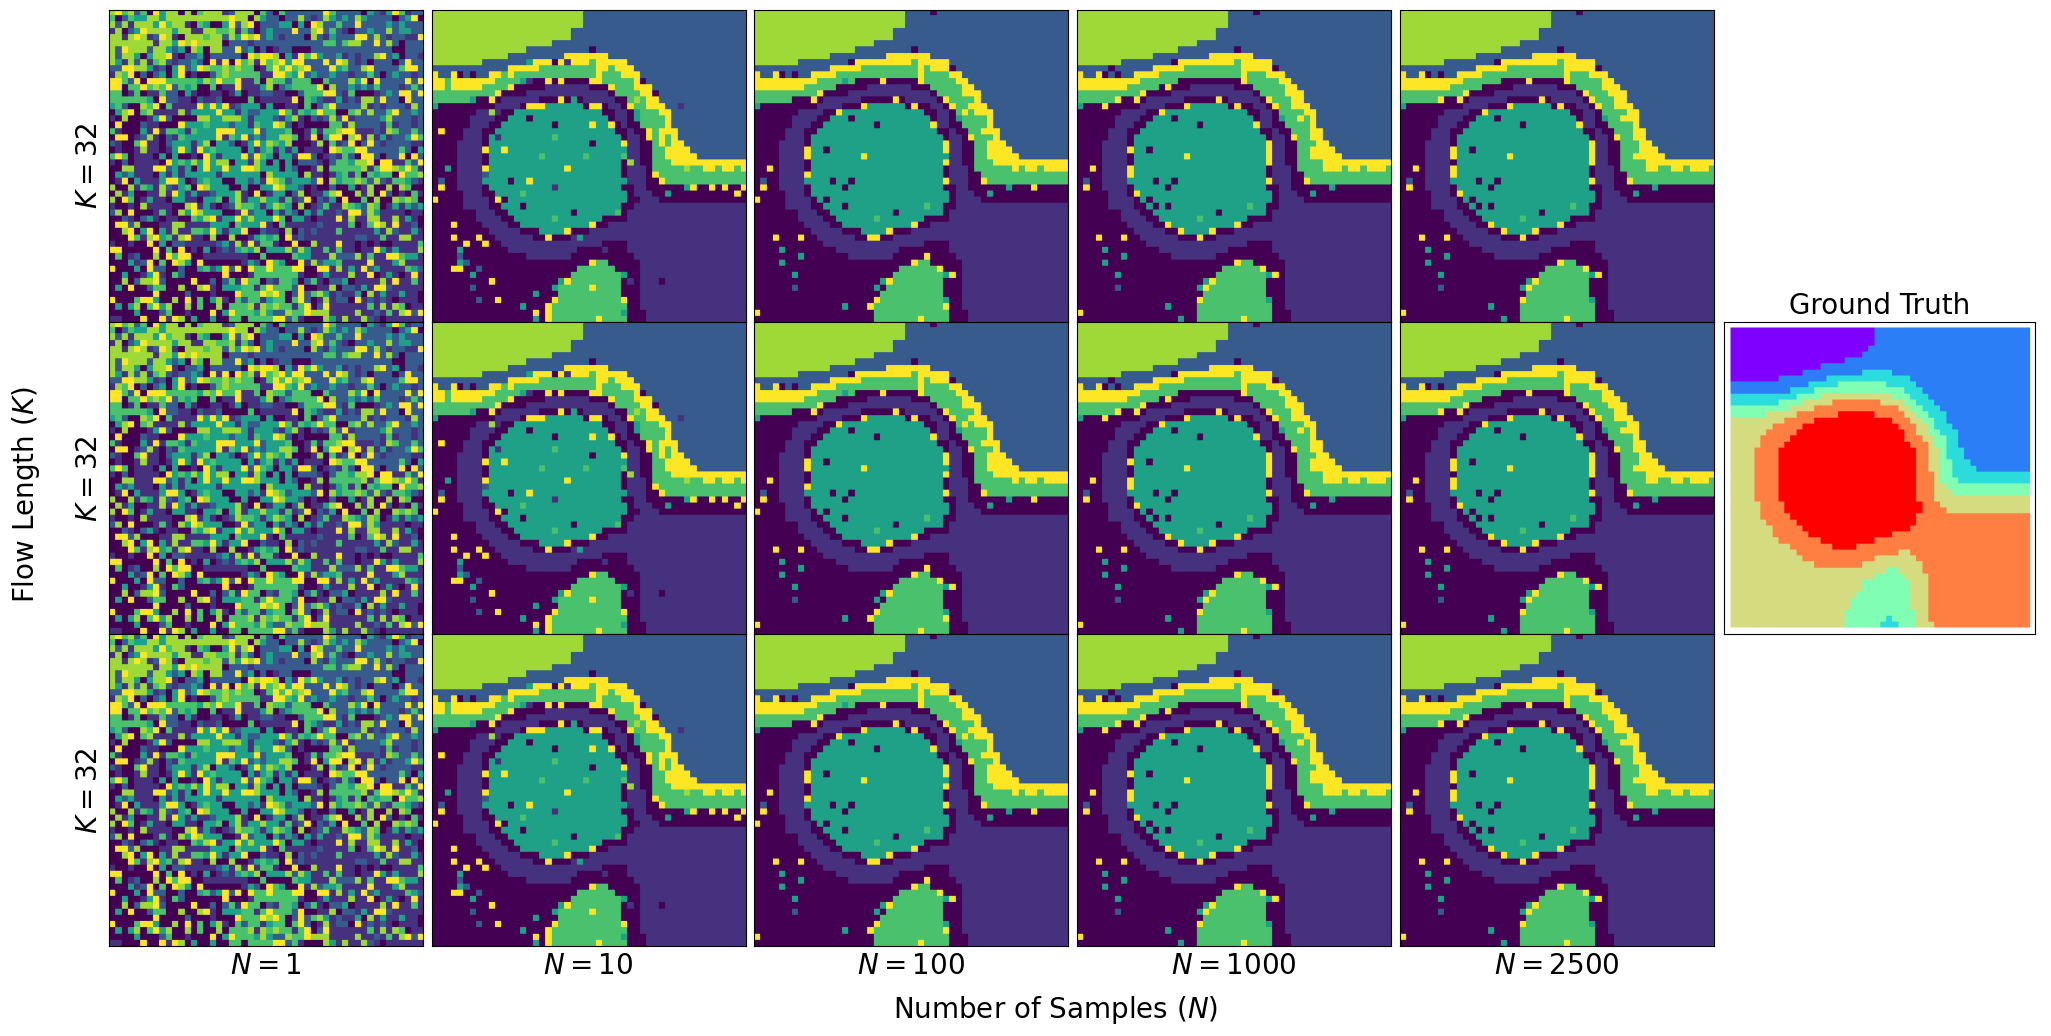

In [6]:
fig, axs = plt.subplots(3, 6, figsize=(20, 10), gridspec_kw={'wspace': 0, 'hspace': 0, 'width_ratios': [1, 1, 1, 1, 1, 1]})  # Adjust figsize as needed

flow_depth_options = [2, 8, 32]
sample_options = [1, 10, 100, 1000, 2500]

flow_depth_options = [32, 32, 32]
sample_options = [1, 10, 100, 1000, 2500]

try:
    ground_truth_image = plt.imread('../results/SYNTHETIC/ground_truth.png')
except FileNotFoundError:
    print("Ground truth image not found! Check the file path.")
    ground_truth_image = None

for i in range(len(flow_depth_options)):
    for j in range(len(sample_options)): 
        file_path = f"../results/SYNTHETIC/XenNF/DATA_DIM=5/K=7/INIT={INIT_METHOD}/NEIGHBORSIZE=1/FLOW_TYPE={FLOW_TYPE}/FLOW_LENGTH={flow_depth_options[i]}/HIDDEN_LAYERS={HIDDEN_LAYERS}/simple_result_nsamples={sample_options[j]}.png"
        axs[i, j].imshow(plt.imread(file_path))
        axs[i, j].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
        if i == len(flow_depth_options) - 1:
            axs[i, j].set_xlabel(rf"$N = {sample_options[j]}$", fontsize=20)
        if j == 0:
            axs[i, j].set_ylabel(rf"$K = {flow_depth_options[i]}$", fontsize=20)

for i in [0, 2]:  
    axs[i, 5].axis('off')  

ground_truth_image = plt.imread('../results/SYNTHETIC/ground_truth_no_axes.png')
axs[1, len(sample_options)].imshow(ground_truth_image)
axs[1, len(sample_options)].set_title(f"Ground Truth", fontsize=20)  
axs[1, len(sample_options)].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# Add global x-axis and y-axis labels
fig.text(0.5, -0.015, r'Number of Samples ($N$)', ha='center', va='center', fontsize=20)
fig.text(-0.015, 0.5, r'Flow Length ($K$)', ha='center', va='center', rotation='vertical', fontsize=20)

plt.tight_layout() 
plt.savefig("synthetic.png")
plt.show()